# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

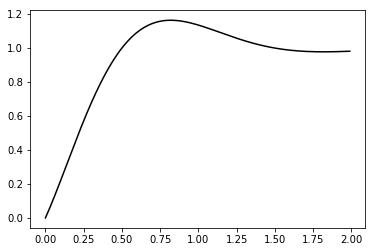

In [22]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

## Solution
* The value of $a$ that mimimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$ is $-0.53$
* The residual mean squared error plot is given below in Figure $4$. The minimum residual mean squared error is $2.46909$
* $L_{2}norm(a)$ = $||f-g||$ = $\sqrt(\int_0^2 ((f(t,a)-g(t))^2\,dt)$ , where $a$ is a free parameter. By plotting $L_{2}norm$ versus $a$, we got the minimum value of $L_2$ norm and the corresponding $a$. The value of $a$ that minimizes $L_2$ norm is found to be $-0.53$ according to Figure $3$

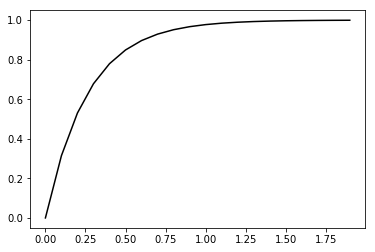

In [23]:
def f(t,a):
    return 1-np.exp(-1*a*t)
t2 = np.arange(0.0,2.0,0.1)

plt.figure(2)
plt.plot(t2, f(t2,3.78), 'k')
plt.show()


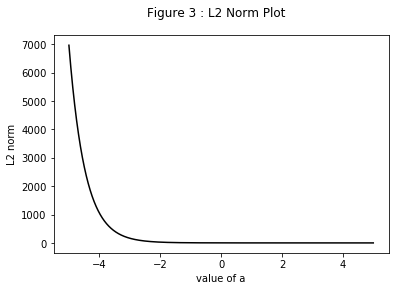

The value of a that minimizes L2 norm = 4.603


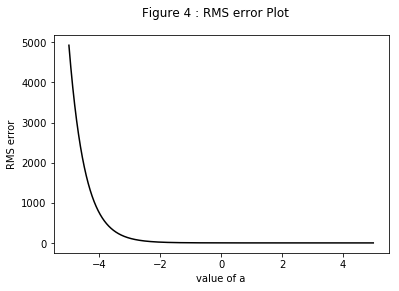

minimum RMS error = 0.106390891637


In [25]:
from scipy.integrate import quad
import math

#Definition of integrant for L2 norm calculation
def modOfFunc(t,a):
    integrand = ((abs(f(t,a)-g(t)))**2)
    return integrand


#L2 norm plot
start=-5
stop=5
inter=0.001
a=np.arange(start,stop,inter)
L2_norm_integrate=np.arange((stop-start)/inter)
for i,val in enumerate(a):
    L2_norm_integrate[i] = math.sqrt((quad(modOfFunc,0,2,args=(val)))[0])

#Plotting L2 norm Vs Time
fig3=plt.figure(3)
plt.plot(a, L2_norm_integrate, 'k')
fig3.suptitle("Figure 3 : L2 Norm Plot")
plt.xlabel("value of a")
plt.ylabel("L2 norm")
plt.show()

#Value of a corresponding to Minimum L2 norm
norm_min = a[np.argmin(L2_norm_integrate)]
print("The value of a that minimizes L2 norm = "+str(norm_min))

#Residual Mean Square Error (RMS)
rms=np.arange((stop-start)/inter)
for i,val in enumerate(a):
    rms[i] = math.sqrt(((quad(modOfFunc,0,2,args=(val)))[0])/2)

#RMS plot
fig4=plt.figure(4)
plt.plot(a, rms, 'k')
fig4.suptitle("Figure 4 : RMS error Plot")
plt.xlabel("value of a")
plt.ylabel("RMS error")
plt.show()

#Minimum RMS errorssssss
rms_min = rms[np.argmin(rms)]
print("minimum RMS error = "+str(rms_min))
